# Building and Visualizing word frequencies

In this lab, we will focus on the build_freqs() helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.


In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets

print("number of tweets : ",len(tweets))


number of tweets :  10000


now we will build a label array that matches our tweets.
This array will be composed of 10000 elements
The first 5000 will be filled with 1 labels denoting positiv sentments, while the next 5000 will be 0 labels denoting negative sentiments

In [4]:
labels = np.append(np.ones(len(all_positive_tweets)),np.zeros(len(all_negative_tweets)) )

In [5]:
labels[0]

1.0

In [6]:
labels[9999]

0.0

In [7]:
dictionary = {'key1' : 1 , 'key2': 2 }

In [8]:
#adding new entry
dictionary['key3'] = -4

#overwritng thevalue of key1
dictionary['key1'] = 0

print(dictionary)


{'key1': 0, 'key2': 2, 'key3': -4}


Acessing values and lookup keys
- we can use the square breacket notation 
- get() method

In [9]:
print(dictionary['key2'])

2


In [10]:
print(dictionary['key9'])

KeyError: 'key9'

In [11]:
#this prints a value
if 'key1' in dictionary:
    print("item found : ",dictionary['key1'])

else:
    print('key1 is not defined')

#same but with the get function
print("item found : " , dictionary.get('key1' , -1))

item found :  0
item found :  0


In [12]:
# This prints a message because the key is not found
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('key does not exist!')

# This prints -1 because the key is not found and we set the default to -1
print(dictionary.get('key7', -1))

key does not exist!
-1


LETS TAKE A LOOK AT BUILD_FREQS() FUNCTION THAT IS INBUILT IN COURSERA NOTEBOOK.
THIS FUNCTION CREATES THE DICTIONARY CONTAINING THE WORD COUNTS FROM EACH CORPUS

In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweets(tweet):
    #remove the old style retweet text "RT"
    tweet2 = re.sub( r'^RT[\s]+' , '' ,tweet)

    #remove hyperlinks
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*' , '' ,      tweet2)

    #remove hashtag (only the # sign)
    tweet2 = re.sub(r'#' , '' ,tweet2)

    #instantiate the tokenizer class
    tokenizer = TweetTokenizer  (preserve_case=False,
                          strip_handles=True,
                          reduce_len = True)

    #tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet2)

    #importing the english stop words from nltk
    stopwords_english = stopwords.words('english')

    tweets_clean = []

    for word in tweet_tokens:
        if(word not in stopwords_english 
        and 
        word not in string.punctuation):
            tweets_clean.append(word)
    
    stemmer = PorterStemmer()

    #create an empty list to store the stems
    tweets_stem = []

    for word in tweets_clean:
        stem_word = stemmer.stem(word)  
        #stemming word
        tweets_stem.append(stem_word)
    
    return tweets_stem 

print(process_tweets(tweets[2277]))



['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [16]:
def build_freqs(tweets , ys):
    """Build frequencies
    input:
        tweets : a list of tweets
        ys: an mx1 array with the sentiment label of each tweet(either 0 or 1)
    output:
        freqs: a dictionary mapping each (word,sentiment) pair to its frequency
        """
    
    #convert the np array to list since zip needs an iterble
    # The squeeze is necessary or the list ends up with  one element
    # also note that this is just a NOP if ys is already a list
     
    yslist = np.squeeze(ys).tolist()

    #start with an empty dictionary and populate it by looping  over all tweets
    # and over all processed words in each tweet
    freqs={}

    for y , tweet in zip(yslist , tweets):
        for word in process_tweets(tweet):
            pair =  (word,y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs
    

LETS UNDERSTAND THE LOGIC BEHIND THIS 

### "folowfriday" appears 25 times in the positive tweets
('followfriday', 1.0): 25

### "shame" appears 19 times in the negative tweets
('shame', 0.0): 19 

In [17]:
# create frequency dictionary
freqs = build_freqs(tweets,labels)

#check data type
print(f'type(freqs) = {type(freqs)}')

#check length
print(f'length(freqs) = {len(freqs)}')


type(freqs) = <class 'dict'>
length(freqs) = 13066


In [18]:
print(freqs)

psha', 0.0): 1, ('nia', 0.0): 1, ('strap', 0.0): 1, ('dz9055', 0.0): 1, ('entlead', 0.0): 1, ('590', 0.0): 1, ('twice', 0.0): 5, ('07:02', 0.0): 1, ('ifsc', 0.0): 1, ('mayor', 0.0): 1, ('biodivers', 0.0): 1, ('taxonom', 0.0): 1, ('collabor', 0.0): 1, ('speci', 0.0): 1, ('discoveri', 0.0): 1, ('collar', 0.0): 1, ('3:03', 0.0): 1, ('belt', 0.0): 1, ('smith', 0.0): 2, ('eyelin', 0.0): 1, ('therefor', 0.0): 1, ('netherland', 0.0): 1, ('el', 0.0): 1, ('jeb', 0.0): 1, ('blacklivesmatt', 0.0): 1, ('slogan', 0.0): 1, ('msnbc', 0.0): 1, ('jebbush', 0.0): 1, ('famish', 0.0): 1, ('marino', 0.0): 1, ('qualifi', 0.0): 2, ('suzi', 0.0): 1, ('skirt', 0.0): 1, ('tama', 0.0): 1, ('warrior', 0.0): 2, ('wound', 0.0): 1, ('iraq', 0.0): 1, ('be', 0.0): 2, ('camara', 0.0): 1, ('coveral', 0.0): 1, ('happili', 0.0): 1, ('sneezi', 0.0): 1, ('rogerwatch', 0.0): 1, ('stalker', 0.0): 1, ('velvet', 0.0): 1, ('tradit', 0.0): 1, ("people'", 0.0): 1, ('beheaviour', 0.0): 1, ("robert'", 0.0): 1, ('.\n.', 0.0): 2, ('aa

In [22]:
#LETS visuailzse a word count

keys = ['happi' , 'merri' , 'nice' ,'good' ,'bad' ,'sad' ,'mad' , 'best' ,'song' ,'power' ,'maginific','pretti','play',':)',':(']

data =[]

for word in keys :

    pos = 0
    neg = 0

    #retrueve number of positive counts
    if(word,1) in freqs:
        pos = freqs[(word,1)]

    #retrieve number of negative counts
    if (word,0) in freqs:
        neg = freqs[(word,0)]
    
    #append the word counts to the table
    data.append([word,pos,neg])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['song', 22, 27],
 ['power', 7, 6],
 ['maginific', 0, 0],
 ['pretti', 20, 15],
 ['play', 46, 48],
 [':)', 3568, 2],
 [':(', 1, 4571]]

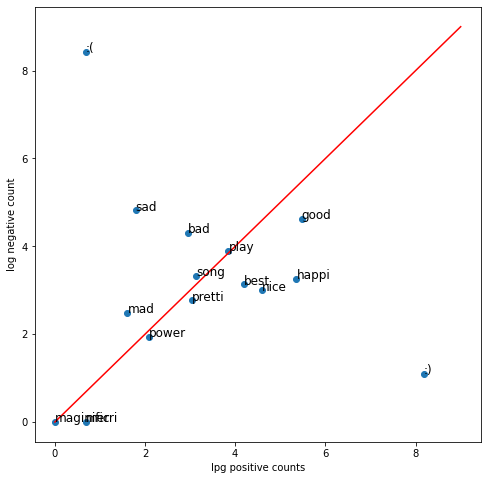

In [23]:
fig , ax = plt.subplots(figsize = (8,8))

#convert positive raw counts to logarithmic scale. We add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

#same for negative counts
y = np.log([x[2]+1 for x in data])

ax.scatter(x,y)

plt.xlabel("lpg positive counts")
plt.ylabel("log negative count")

#add the word as the label at the same position as you added the points just before

for i in range(0,len(data)):
    ax.annotate(data[i][0] , (x[i],y[i]) , fontsize =12)

ax.plot([0,9],[0,9],color ='red')

plt.show()